In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Magnification is defined on the scale bar in the image
Magnification=200

img = cv2.imread('pureSilica 03.tif',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

image_rows, image_cols= img.shape
print(img.shape)

(1036, 1344)


### Detect scale bar to know the pixel and distance ratio

In [2]:
imgg = cv2.imread("pureSilica 01.tif")
image = cv2.cvtColor(imgg,cv2.COLOR_BGR2HLS)
lower = np.uint8([0, 250, 0])
upper = np.uint8([255, 255, 255])
whitemask = cv2.inRange(image, lower, upper)

edges = cv2.Canny(whitemask, 50, 150)

lines = cv2.HoughLinesP(edges,1,np.pi/180,1,minLineLength=100,maxLineGap=30)

for x1,y1,x2,y2 in lines[0]:
    cv2.line(imgg,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imwrite('LineBarScale.jpg',imgg)
    Scale_Bar_Pixel=abs(x1-x2)
    Distance_Pixel_ratio=Magnification/Scale_Bar_Pixel
    print("Distance_Pixel_ratio:",Distance_Pixel_ratio)
    

#cv2.imshow("edges",edges)
#cv2.waitKey(0)

Distance_Pixel_ratio: 0.5494505494505495


### Detect circles

In [3]:

## Funding the detected circles in the vectors of 3 elements (x,y,r)
## Parameters to detect circles
# dp=Inverse ratio of the accumulator resolution to the image resolution
# minDist= Minimum distance between the centers of the detected circles.

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp=1,minDist=10, param1=90,param2=10,minRadius=5,maxRadius=16)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
#    draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#    draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

circles = np.round(circles[0, :]).astype("int")

### Histogram of radius distribution

the average radius in pixel: 11 pixel
the average size: 12.08791208791209 nm


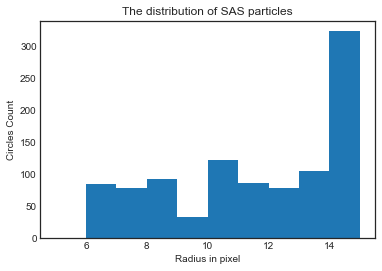

In [4]:

plt.style.use('seaborn-white')
plt.hist(circles[:,2])
plt.xlabel('Radius in pixel')
plt.ylabel('Circles Count')
plt.title('The distribution of SAS particles')
plt.savefig('The distribution of SAS particles.jpg')

totAvgRadiusPixel = sum(i[2] for i in circles) // len(circles)
totAvgSize=2*totAvgRadiusPixel*Distance_Pixel_ratio

print("the average radius in pixel:",totAvgRadiusPixel,"pixel")
print("the average size:",totAvgSize,"nm")

### Plotting detected circles

In [ ]:

cv2.imshow('detected circles',cimg)
cv2.imwrite('DetectedParticles.jpg',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()
